# Finalizing the update on the pre-columbian map 
## New version: Murdock polygons at the ends of America 

In [6]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import mapclassify
from matplotlib.patches import Patch
from pathlib import Path
import matplotlib.patches as mpatches

In [7]:
# Set base project path
base_path = Path("C:/Users/juami/Dropbox/RAships/2-Folklore-Nathan-Project/EA-Maps-Nathan-project/Measures_work")

# Set file paths
precol_path = base_path / "maps" / "interim" / "pre_columbian_update" / "world_thiessen_UPDATE" / "EAESW_XY_World_Thiessen_Update.shp"
basemap_path = base_path / "maps" / "interim" / "World" / "world_dissolve_nolakes.shp"

EA_csv_path = base_path / "data" / "raw" / "ethnographic_atlas" / "ethnographic_atlas_east_siberia_wes_vfinal.csv"
precol_csv_path = base_path / "data" / "interim" / "Motifs_EA_WESEE_humanvsnature_all.csv"

export_path = base_path / "deliveries" / "maps_presentation_12052025"

## Importing shapes and data 

In [8]:
# Read the shapefiles and CSV files
precol_shape = gpd.read_file(precol_path)
basemap_shape = gpd.read_file(basemap_path)

EA_df = pd.read_csv(EA_csv_path)
precol_df = pd.read_csv(precol_csv_path)

In [9]:

#Merging EA variables that are not in the precol_df
precol_df = precol_df.merge(EA_df, left_on='v107', right_on='v107', how='left')

#Fixing identifier in the shapefile
precol_df.head()

,v91_x,v92_x,v93_x,v107,v114_x,atlas,group_berezkin,n_motifs,n_triplets_scl,n_triplets_excl_scl,...,v97,v98,v99,v100,v102,v104,v106,v112,v113,v114_y
0,A,a,5.0,MBUTI . .,1.0,MBUTI,Mbuti & Efe Pigmies,29.0,116.0,102.0,...,1,3,2,0,1930.0,2,28,8.0,2.0,1.0
1,A,a,8.0,XAM . . .,2.0,XAM,Bushmen,60.0,201.0,187.0,...,1,1,0,0,1850.0,-30,23,0.0,0.0,2.0
2,A,a,7.0,NARON . .,2.0,NARON,Bushmen,60.0,201.0,187.0,...,1,1,0,0,1910.0,-20,24,0.0,0.0,2.0
3,A,a,1.0,KUNG. . .,2.0,KUNG,Bushmen,60.0,201.0,187.0,...,1,1,0,0,1950.0,-20,21,1.0,2.0,2.0
4,A,a,4.0,BERGDAMA.,3.0,BERGDAMA,Khoikhoi,70.0,274.0,255.0,...,1,1,0,0,1920.0,-22,16,1.0,0.0,3.0


## Creating one unique identifier from all the other v107 per world region

In [10]:

# Initialize v107_master with EAW_XY_Ame
precol_shape['v107_master'] = precol_shape['EAW_XY_Ame']

# Sequentially fill missing values from fallback columns
fallback_columns = ['EAW_XY_Isl', 'EAESW_XY_E', 'EAW_XY_Afr', 'v107']

for col in fallback_columns:
    precol_shape['v107_master'] = precol_shape['v107_master'].fillna(precol_shape[col])

# Filter and show rows where 'v107_master' is not null
precol_shape[precol_shape['v107_master'].isna()]

,EAW_XY_Ame,ethnicity,matched_EA,distance_t,final_ethn,v107,EA_v107_cl,EAW_XY_Isl,EAESW_XY_E,EAW_XY_Afr,Shape_Leng,Shape_Area,geometry,v107_master
287,None,Algonkin,None,3.486645,None,None,None,None,None,None,26.144084,31.907416,"POLYGON ((-75.091 47.982, -74.857 47.933, -74....",None
288,None,Antena,None,0.946706,None,None,None,None,None,None,11.747592,6.784199,"POLYGON ((-144.03 61.182, -144.58 61.02, -144....",None
294,None,Beothuk,None,9.053301,None,None,None,None,None,None,99.310478,13.277803,"POLYGON ((-55.893 51.623, -55.891 51.617, -55....",None
296,None,Bo,None,4.505095,None,None,None,None,None,None,21.976111,4.914605,"POLYGON ((-82.279 64.738, -82.255 64.722, -82....",None
301,None,Comok,None,0.164759,None,None,None,None,None,None,1.721294,0.025810,"MULTIPOLYGON (((-122.82 49.584, -122.58 49.41,...",None
308,None,Hare,None,10.535413,None,None,None,None,None,None,24.444795,18.840526,"MULTIPOLYGON (((-124.62 66.216, -124.62 66.211...",None
317,None,Lake,None,0.524181,None,None,None,None,None,None,9.799024,5.224354,"POLYGON ((-117.87 51.674, -117.85 51.453, -117...",None
320,None,Malecite,None,0.107364,None,None,None,None,None,None,0.627659,0.000091,"POLYGON ((-69.935 47.574, -69.936 47.575, -69....",None
321,None,Meckenzie Eskimo,None,8.607264,None,None,None,None,None,None,115.055372,37.959786,"MULTIPOLYGON (((-117.69 68.979, -117.62 68.984...",None
324,None,Mountain,None,9.205445,None,None,None,None,None,None,16.652563,13.191665,"POLYGON ((-124.79 65.933, -124.2 65.709, -123....",None


In [11]:
precol_shape = precol_shape.drop(columns=['EAW_XY_Ame', 'EAW_XY_Isl', 'EAESW_XY_E', 'EAW_XY_Afr', 'v107','distance_t', 'final_ethn','EA_v107_cl', 'matched_EA'], errors='ignore')
precol_shape.rename(columns={'ethnicity': 'ethnicity_murdock'}, inplace=True)
precol_shape.head()

,ethnicity_murdock,Shape_Leng,Shape_Area,geometry,v107_master
0,None,14.354424,11.523335,"POLYGON ((-100.5 20.5, -100 19.5, -100 17, -10...",TARASCO .
1,None,18.556068,13.586026,"POLYGON ((-102.85 26.986, -106.96 23.905, -107...",TEPEHUAN.
2,None,14.434656,11.755602,"POLYGON ((-103.61 29.389, -103.07 27.5, -108.5...",TARAHUMAR
3,None,10.220881,2.938494,"MULTIPOLYGON (((-114.94 27.838, -115 27.743, -...",KILIWA. .
4,None,21.987951,6.508624,"MULTIPOLYGON (((-111.8 26.89, -111.85 26.81, -...",SERI. . .


## Merging shape with the EA information data 

In [12]:

# Merge the shapefiles with the CSV data
precol_shape_merged = precol_shape.merge(precol_df, left_on='v107_master', right_on='v107', how='left')

precol_shape_merged.head()

,ethnicity_murdock,Shape_Leng,Shape_Area,geometry,v107_master,v91_x,v92_x,v93_x,v107,v114_x,...,v97,v98,v99,v100,v102,v104,v106,v112,v113,v114_y
0,None,14.354424,11.523335,"POLYGON ((-100.5 20.5, -100 19.5, -100 17, -10...",TARASCO .,N,j,8.0,TARASCO .,339.0,...,4.0,99.0,0.0,0.0,1600.0,19.0,-101.0,1.0,0.0,339.0
1,None,18.556068,13.586026,"POLYGON ((-102.85 26.986, -106.96 23.905, -107...",TEPEHUAN.,N,i,9.0,TEPEHUAN.,333.0,...,0.0,0.0,0.0,0.0,1920.0,27.0,-107.0,0.0,0.0,333.0
2,None,14.434656,11.755602,"POLYGON ((-103.61 29.389, -103.07 27.5, -108.5...",TARAHUMAR,N,i,1.0,TARAHUMAR,336.0,...,4.0,46.0,0.0,0.0,1930.0,28.0,-107.0,1.0,0.0,336.0
3,None,10.220881,2.938494,"MULTIPOLYGON (((-114.94 27.838, -115 27.743, -...",KILIWA. .,N,c,34.0,KILIWA. .,302.0,...,4.0,43.0,53.0,0.0,1880.0,31.0,-115.0,0.0,0.0,302.0
4,None,21.987951,6.508624,"MULTIPOLYGON (((-111.8 26.89, -111.85 26.81, -...",SERI. . .,N,i,4.0,SERI. . .,334.0,...,4.0,99.0,0.0,0.0,1900.0,29.0,-112.0,0.0,0.0,334.0


## Exporting the final shape (is in GPKG to avoind problems in ArcGIS)

In [13]:
# Export the final GeoDataFrame to a shapefile (GPKG format to make it compatible with ArcGIS)
precol_shape_merged.to_file(base_path / "maps" / "interim" / "pre_columbian_update" / "world_thiessen_UPDATE" / "EAESW_XY_World_Thiessen_MurdockUpdate_EAinfo.gpkg", driver="GPKG")

# Making a First try of a plot

In [14]:
def truncate_colormap(cmap_name='BuPu', minval=0.3, maxval=1.0, n=100):
    cmap = plt.get_cmap(cmap_name)
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f'{cmap_name}_trunc', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Create a stronger BuPu (skip the lightest 30%)
strong_bupu = truncate_colormap('BuPu', 0.3, 1.0)

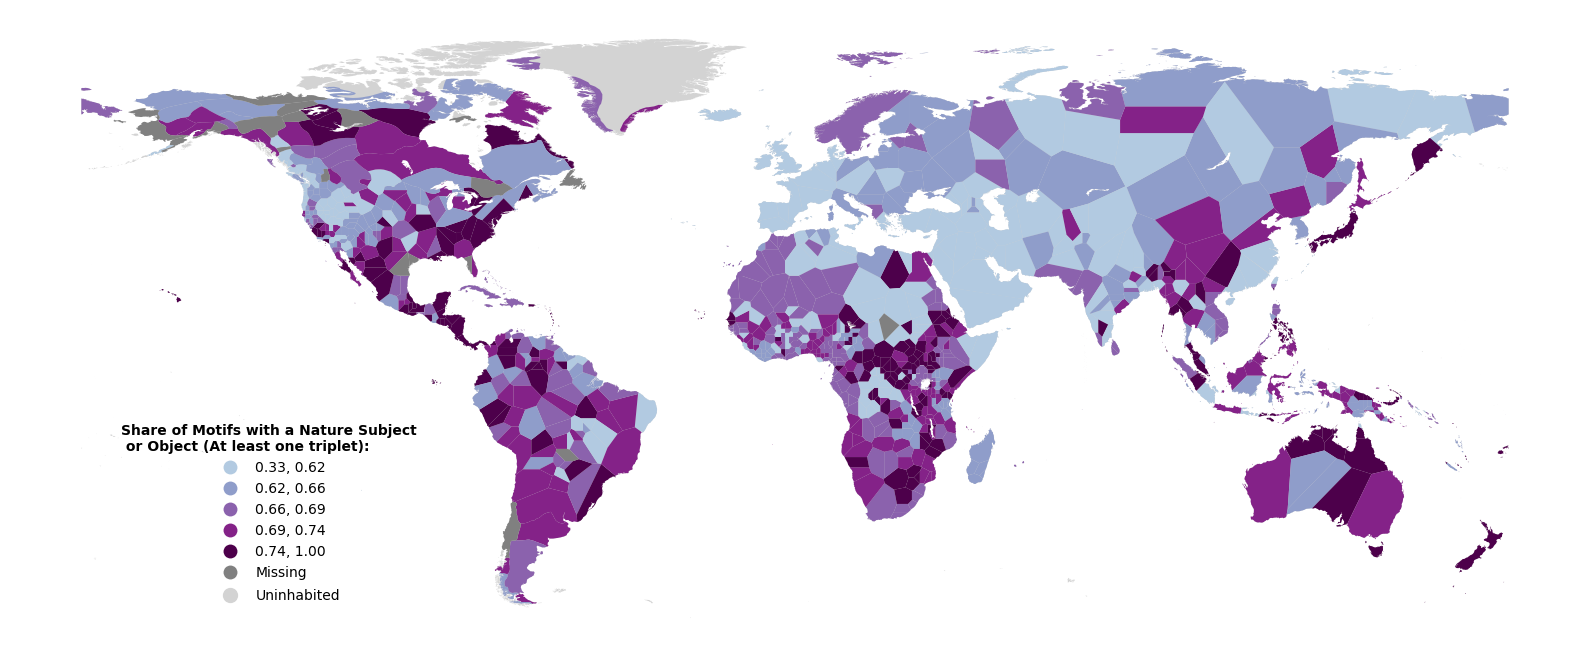

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), facecolor='white')

# 1. Plot background first (e.g., world countries)
basemap_shape.plot(
    ax=ax,
    color='lightgray',
    edgecolor='black',
    linewidth=0
)

# 2. Plot your actual data on top
gdf = precol_shape_merged.copy()

gdf.plot(
    ax=ax,
    column='sh_nature_any_motif_atl',
    scheme='quantiles',
    k=5,
    edgecolor='none',
    linewidth=0,
    cmap=strong_bupu,
    legend=True,
    legend_kwds={'frameon': False},
    missing_kwds={
        "color": "gray",
        "label": "Missing"
    }
)

# Remove axis
ax.set_axis_off()

# Move legend using bbox_to_anchor (x, y, width, height)
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((0.07, 0.17, 0.2, 0.2))  # Fine-tune as needed
    leg.set_title("Share of Motifs with a Nature Subject \n or Object (At least one triplet):",
                  prop={'weight': 'bold'})
    leg.set_frame_on(False)  # No border

from matplotlib.lines import Line2D

# 3. Create and add a custom patch for 'Uninhabited'
uninhabited_circle = Line2D(
    [0], [0],
    marker='o',
    color='lightgray',
    linestyle='None',
    markersize=10,
    label='Uninhabited'
)

custom_legend = ax.legend(
    handles=[uninhabited_circle],
    loc='lower left',
    bbox_to_anchor=(0.1235, 0.05, 0.2, 0.2),
    frameon=False
)

# Combine with existing legend (optional)
ax.add_artist(leg)

plt.tight_layout()

# Save to PDF
plt.savefig(export_path / "PRECOL_sh_nature_any_motif_atl.pdf", format='pdf', bbox_inches='tight')

# Optional: also show the figure
plt.show()

# Making another try of plot (I like this one better)

C:\Users\juami\AppData\Local\Temp\ipykernel_4444\1900950089.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bufferGdf['geometry'] = bufferGdf.buffer(.0000000000001)


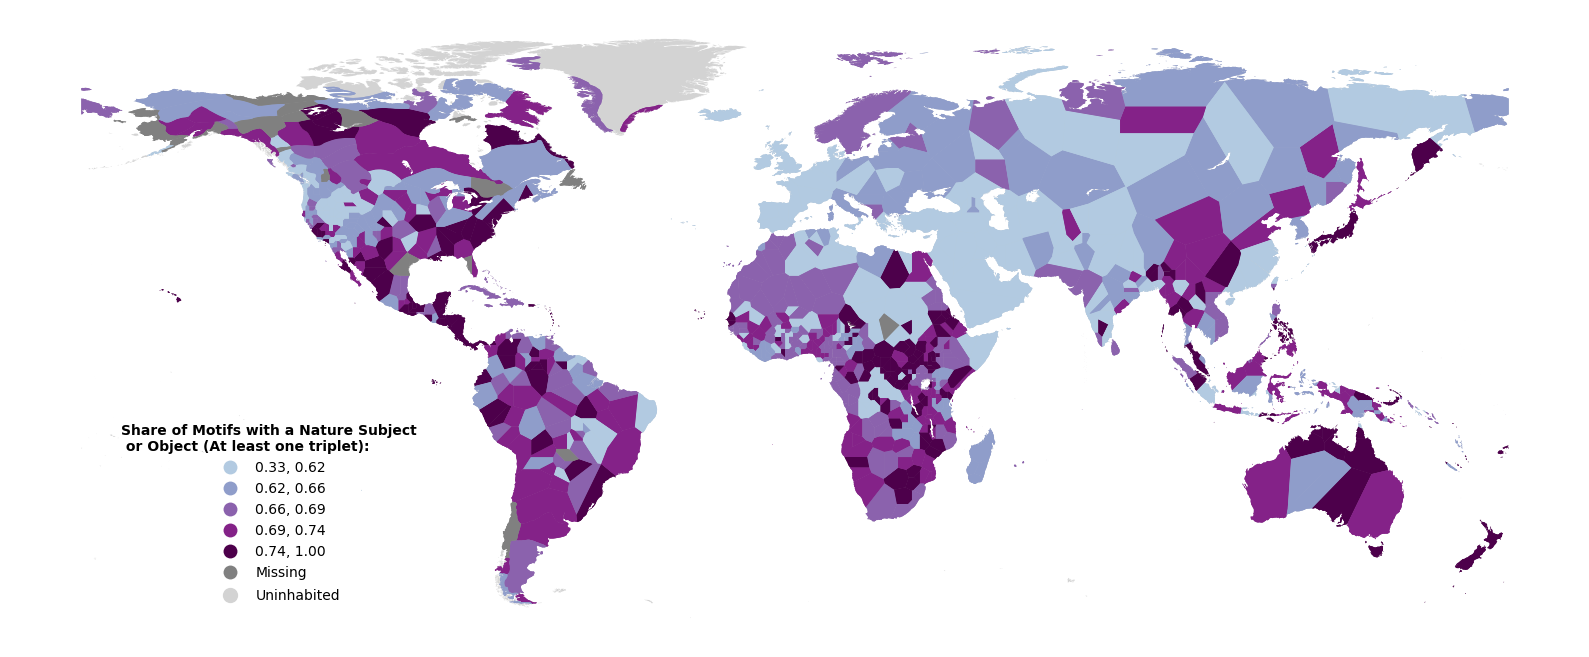

In [16]:
#precol_shape_merged['geometry'] = precol_shape_merged['geometry'].simplify(tolerance=0.001, preserve_topology=True)

fig, ax = plt.subplots(1, 1, figsize=(16, 8), facecolor='white')

# 1. Create a small inward buffer and keep original attributes
bufferGdf = precol_shape_merged.copy()
bufferGdf['geometry'] = bufferGdf.buffer(.0000000000001)

# 1. Plot background first (e.g., world countries)
basemap_shape.plot(
    ax=ax,
    color='lightgray',
    edgecolor='black',
    linewidth=0
)

# 2. Plot the buffered polygons with thematic fill
bufferGdf.plot(
    ax=ax,
    column='sh_nature_any_motif_atl',
    scheme='quantiles',
    k=5,
    edgecolor='none',
    linewidth=0,
    cmap=strong_bupu,
    legend=False,
    legend_kwds={'frameon': False},
    missing_kwds={
        "color": "gray",
        "label": "Missing"
    }
)

precol_shape_merged.plot(
    ax=ax,
    column='sh_nature_any_motif_atl',
    scheme='quantiles',
    k=5,
    edgecolor='none',
    linewidth=0,
    cmap=strong_bupu,
    legend=True,
    legend_kwds={'frameon': False},
    missing_kwds={
        "color": "gray",
        "label": "Missing"
    }
)

# Remove axis
ax.set_axis_off()

# Move legend using bbox_to_anchor (x, y, width, height)
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((0.07, 0.17, 0.2, 0.2))  # Fine-tune as needed
    leg.set_title("Share of Motifs with a Nature Subject \n or Object (At least one triplet):",
                  prop={'weight': 'bold'})
    leg.set_frame_on(False)  # No border

from matplotlib.lines import Line2D

# 3. Create and add a custom patch for 'Uninhabited'
uninhabited_circle = Line2D(
    [0], [0],
    marker='o',
    color='lightgray',
    linestyle='None',
    markersize=10,
    label='Uninhabited'
)

custom_legend = ax.legend(
    handles=[uninhabited_circle],
    loc='lower left',
    bbox_to_anchor=(0.1235, 0.05, 0.2, 0.2),
    frameon=False
)

# Combine with existing legend (optional)
ax.add_artist(leg)

plt.tight_layout()

# Save to PDF
plt.savefig(export_path / "PRECOL_sh_nature_any_motif_atl_noborder.pdf", format='pdf', bbox_inches='tight')

# Optional: also show the figure
plt.show()
